In [13]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x_data = np.linspace(0.0, 10.0, 100000)
noise = np.random.randn(len(x_data))

In [15]:
np.shape(noise)

(100000,)

In [16]:
x_data

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [17]:
noise

array([-0.3644313 ,  0.37982864, -0.57538421, ...,  1.84557246,
        0.77689819, -0.71422478])

In [18]:
y_true = (0.5 * x_data) + 5 + noise


In [19]:
y_true

array([ 4.6355687 ,  5.37987864,  4.42471579, ..., 11.84547246,
       10.77684819,  9.28577522])

In [20]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

In [21]:
y_df = pd.DataFrame(data = y_true, columns = ['Y Data'])

In [22]:
x_df.head()

,X Data
0,0.0000
1,0.0001
2,0.0002
3,0.0003
4,0.0004


In [23]:

y_df.head()

,Y Data
0,4.635569
1,5.379879
2,4.424716
3,5.334247
4,4.939966


In [24]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [25]:
my_data


,X Data,Y Data
0,0.0000,4.635569
1,0.0001,5.379879
2,0.0002,4.424716
3,0.0003,5.334247
4,0.0004,4.939966
5,0.0005,6.203504
6,0.0006,3.823239
7,0.0007,3.239868
8,0.0008,4.731094
9,0.0009,3.153088


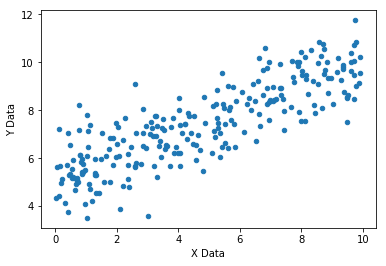

In [26]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y Data')

In [27]:
batch_size = 8


In [28]:
m = tf.Variable(0.81)
b = tf.Variable(-0.17)

In [29]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [30]:
y_model = m* xph + b

In [31]:
error =tf.reduce_sum(tf.square(yph-y_model))

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001 )
train = optimizer.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [34]:
a = np.random.randint(10, size = 8)
x_data[a]


array([0.00090001, 0.00090001, 0.00080001, 0.00060001, 0.00050001,
       0.        , 0.00060001, 0.00050001])

In [35]:
with tf.Session() as sess:
    
    sess.run(init)
    batches = 1000
        
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b  = sess.run([m,b])

In [36]:
model_m


0.4635052

In [37]:
model_b


4.882732

In [38]:
y_hat = x_data* model_m + model_b


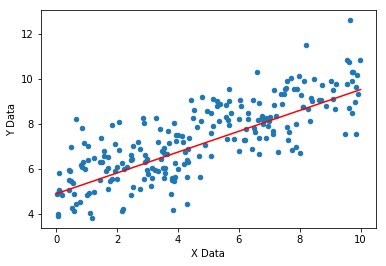

In [39]:
my_data.sample(230).plot(kind = 'scatter', x= 'X Data', y = 'Y Data')
plt.plot(x_data, y_hat,'r')

TF ESTIMATOR

In [40]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]


In [41]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\PeterLi\\AppData\\Local\\Temp\\tmpqlaa4i7x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000225AB8D2A20>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
from sklearn.model_selection import train_test_split


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [45]:
print(x_train.shape)

(70000,)


In [46]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8, num_epochs = None, shuffle = True)

In [47]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8, num_epochs = 1000, shuffle = False)

In [60]:
eval_inputs_func = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size = 8, num_epochs = 1000, shuffle = False)

In [61]:
estimator.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmpqlaa4i7x\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into C:\Users\PeterLi\AppData\Local\Temp\tmpqlaa4i7x\model.ckpt.
INFO:tensorflow:loss = 11.359579, step = 2001
INFO:tensorflow:global_step/sec: 412.626
INFO:tensorflow:loss = 6.5219355, step = 2101 (0.243 sec)
INFO:tensorflow:global_step/sec: 490.126
INFO:tensorflow:loss = 10.447145, step = 2201 (0.203 sec)
INFO:tensorflow:global_step/sec: 462.067
INFO:tensorflow:loss = 4.3144326, step = 2301 (0.215 sec)
INFO:tensorflow:global_step/sec: 541.966
INFO:tensorflow:loss = 7.5668383, step = 2401 (0.186 sec)
INFO:tensorflow:global_step/sec: 555.461
INFO:tensorflow:loss = 9.373574, step = 2501 (0.179 sec)
INFO:tensorflow:global_step/sec: 589.814
INFO:tensorflow:loss = 4.4767456, step = 2601 (0.170 sec)
INFO:tensorflow:global_step/sec: 579.566
INFO:tensorflow:loss = 5.970454, step = 2701 (0.175 sec)
INFO

In [62]:
train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Starting evaluation at 2018-09-16-21:53:06
INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmpqlaa4i7x\model.ckpt-3000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [63]:
eval_metrics = estimator.evaluate(input_fn = eval_inputs_func, steps =1000)

INFO:tensorflow:Starting evaluation at 2018-09-16-21:53:10
INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmpqlaa4i7x\model.ckpt-3000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [64]:
print("trainig data metrics")
print(train_metrics)

trainig data metrics
{'average_loss': 0.9955744, 'loss': 7.9645953, 'global_step': 3000}


In [65]:
print("test data metrics")
print(eval_metrics)

test data metrics
{'average_loss': 0.9987309, 'loss': 7.989847, 'global_step': 3000}


In [66]:
predict = np.linspace(0,10,10)

In [67]:
input_predict = tf.estimator.inputs.numpy_input_fn({'x': predict}, shuffle = False)

In [72]:
a = estimator.predict(input_fn = input_predict)

In [74]:
a
list(a)

INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmpqlaa4i7x\model.ckpt-3000


[{'predictions': array([4.937814], dtype=float32)},
 {'predictions': array([5.50054], dtype=float32)},
 {'predictions': array([6.0632653], dtype=float32)},
 {'predictions': array([6.625991], dtype=float32)},
 {'predictions': array([7.188716], dtype=float32)},
 {'predictions': array([7.7514415], dtype=float32)},
 {'predictions': array([8.314167], dtype=float32)},
 {'predictions': array([8.876892], dtype=float32)},
 {'predictions': array([9.439618], dtype=float32)},
 {'predictions': array([10.002344], dtype=float32)}]

In [79]:
predictions = []
for pred in estimator.predict(input_fn = input_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmpqlaa4i7x\model.ckpt-3000


In [80]:
predictions


[array([4.937814], dtype=float32),
 array([5.50054], dtype=float32),
 array([6.0632653], dtype=float32),
 array([6.625991], dtype=float32),
 array([7.188716], dtype=float32),
 array([7.7514415], dtype=float32),
 array([8.314167], dtype=float32),
 array([8.876892], dtype=float32),
 array([9.439618], dtype=float32),
 array([10.002344], dtype=float32)]

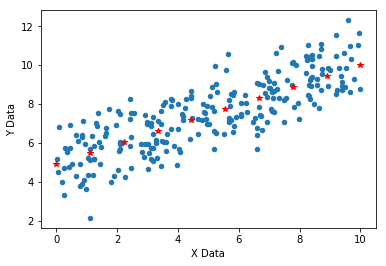

In [83]:
my_data.sample(250).plot(kind = 'scatter', x ='X Data', y = 'Y Data' )
plt.plot(predict, predictions, 'r*')